In [105]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigs, eigsh
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import numpy as np
import scipy.sparse as sp


In [106]:


def laplacian_grid_square(n, N):
    """
    Create the Laplacian matrix for an n x n grid using finite difference method.
    :param n: Grid size (n x n)
    :return: Sparse Laplacian matrix of shape (n^2, n^2)
    """
    
    size = n * n
    diagonals = []
    
    # Main diagonal (-4)
    diagonals.append(-4 * np.ones(size))
    
    # Right and left neighbor diagonals (+1)
    diagonals.append(np.ones(size - 1))
    diagonals.append(np.ones(size - 1))
    
    # Top and bottom neighbor diagonals (+1)
    diagonals.append(np.ones(size - n))
    diagonals.append(np.ones(size - n))
    
    # Convert to sparse matrix
    offsets = [0, 1, -1, n, -n]
    L = sp.diags(diagonals, offsets, shape=(size, size), format='csr')
    
    # Fix row edges (remove horizontal connections between rows)
    for i in range(1, n):
        L[i * n, i * n - 1] = 0
        L[i * n - 1, i * n] = 0
 
    # Visualize the Laplacian matrix as a heatmap
    plt.imshow(L.toarray(), cmap='viridis', interpolation='none')
    plt.colorbar(label='Matrix Value')
    plt.title(f"Laplacian Matrix Heatmap for {n}x{n} Grid")
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")
    plt.show()
    
    return L

# Example usage:
n = 4
laplacian = laplacian_grid_square(n)
print(laplacian.toarray())
np.savetxt("sqaure_laplacian_grid.txt", laplacian.toarray(), fmt="%.2f", header="Laplacian Matrix for n x n Grid", comments="")


TypeError: laplacian_grid_square() missing 1 required positional argument: 'N'

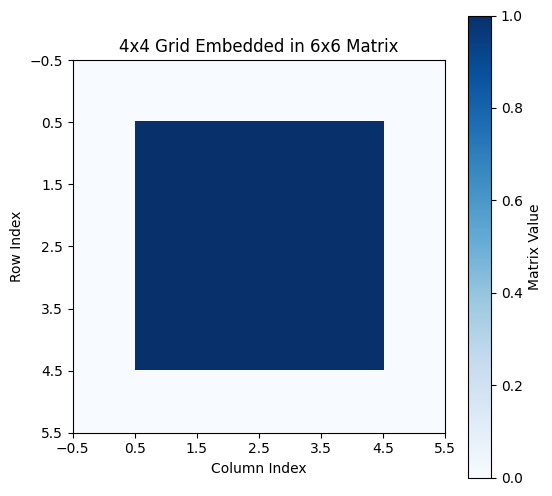

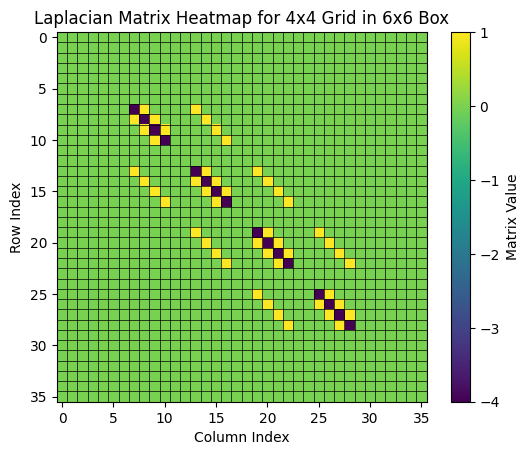

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

def laplacian_grid_square_in_box(n, N):
    """
    Create the Laplacian matrix for an n x n grid placed in a larger N x N grid.
    The rest of the grid is set to zero.
    :param n: Grid size (n x n)
    :param N: Larger box grid size (N x N)
    :return: Sparse Laplacian matrix of shape (N^2, N^2)
        """
        # Create an N x N matrix with zeros
    grid_matrix = np.zeros((N, N))

    # Embed the n x n grid (filled with ones) into the center of the N x N matrix
    start_row = (N - n) // 2
    start_col = (N - n) // 2
    grid_matrix[start_row:start_row + n, start_col:start_col + n] = 1

    # Visualize the grid
    plt.figure(figsize=(6, 6))
    plt.imshow(grid_matrix, cmap='Blues', interpolation='none')
    plt.colorbar(label='Matrix Value')
    plt.title(f"{n}x{n} Grid Embedded in {N}x{N} Matrix")
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")

    ax = plt.gca()
    ax.set_xticks(np.arange(-0.5, N, 1), minor=False)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=False)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", size=0)

    plt.show()

    if n == 1:
        # Special case: 1x1 grid
        L_large = sp.csr_matrix((N * N, N * N))
        center_index = (N // 2) * N + (N // 2)
        L_large[center_index, center_index] = -4
        return L_large

    # Create the Laplacian matrix for the smaller n x n grid
    size = n * n
    diagonals = [-4 * np.ones(size), np.ones(size - 1), np.ones(size - 1), np.ones(size - n), np.ones(size - n)]
    offsets = [0, 1, -1, n, -n]
    L_small = sp.diags(diagonals, offsets, shape=(size, size), format='csr')

    for i in range(1, n):
        L_small[i * n, i * n - 1] = 0
        L_small[i * n - 1, i * n] = 0

    # Embed the smaller Laplacian into a larger N x N grid
    L_large = sp.csr_matrix((N * N, N * N))

    for i in range(n):
        for j in range(n):
            small_idx = i * n + j
            large_idx = (start_row + i) * N + (start_col + j)
            L_large[large_idx, large_idx] = L_small[small_idx, small_idx]
            for k in range(L_small.indptr[small_idx], L_small.indptr[small_idx + 1]):
                neighbor_idx = L_small.indices[k]
                neighbor_large_idx = (start_row + neighbor_idx // n) * N + (start_col + neighbor_idx % n)
                L_large[large_idx, neighbor_large_idx] = L_small.data[k]

    # Visualize the Laplacian matrix
    plt.imshow(L_large.toarray(), cmap='viridis', interpolation='none')
    plt.colorbar(label='Matrix Value')
    plt.title(f"Laplacian Matrix Heatmap for {n}x{n} Grid in {N}x{N} Box")
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")

    ax = plt.gca()
    ax.set_xticks(np.arange(-0.5, N * N, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N * N, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", size=0)

    plt.show()

    return L_large


# Example usage:
n = 4  # Size of the smaller grid
N = 6  # Size of the larger box grid
laplacian = laplacian_grid_square_in_box(n, N)
print(laplacian.toarray())
np.savetxt("square_laplacian_in_box.txt", laplacian.toarray(), fmt="%.2f", header="Laplacian Matrix for n x n Grid in N x N Box", comments="")


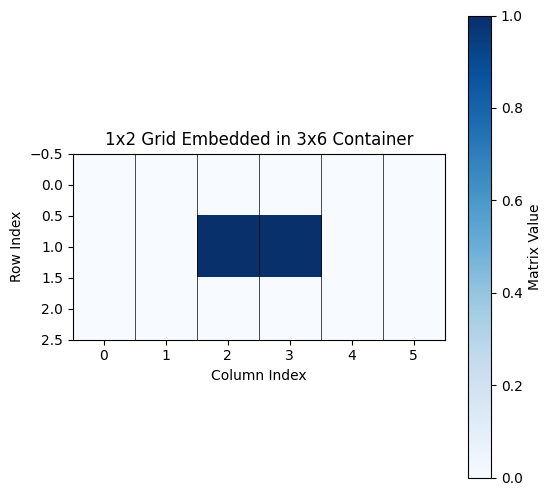

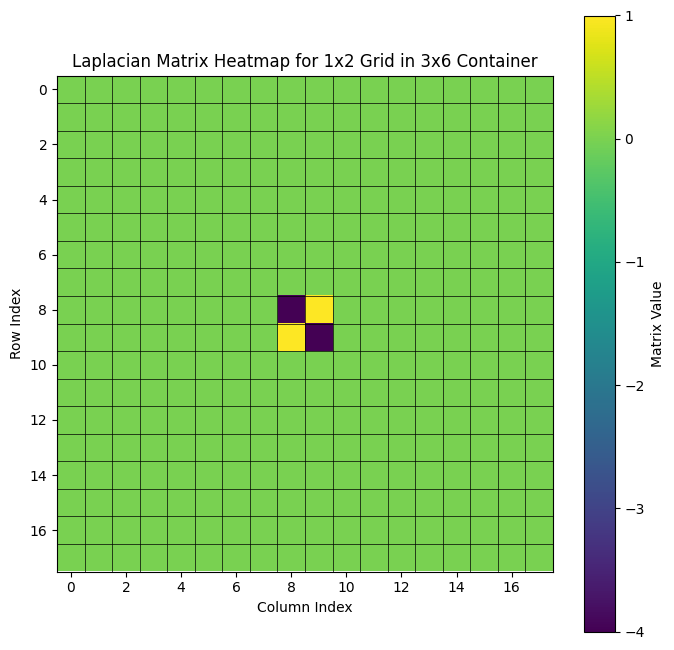

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -4.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -4.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.

In [127]:

def rectangle_laplacian_grid(n, N):
    """
    Create the Laplacian matrix for an n x 2n grid using finite difference method.
    :param n: Grid height
    :return: Sparse Laplacian matrix of shape (2n*n, 2n*n)
    """
    m = 2 * n  # Inner grid width
    M = 2 * N  # Container grid width
    size_inner = n * m
    size_container = N * M

    # Create container grid with zeros
    grid_matrix = np.zeros((N, M))
    start_row = (N - n) // 2
    start_col = (M - m) // 2
    grid_matrix[start_row:start_row + n, start_col:start_col + m] = 1

    # Plot the original grid
    plt.figure(figsize=(6, 6))
    plt.imshow(grid_matrix, cmap='Blues', interpolation='none')
    plt.colorbar(label='Matrix Value')
    plt.title(f"{n}x{2*n} Grid Embedded in {N}x{2*N} Container")
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")
    ax = plt.gca()
    ax.set_xticks(np.arange(-0.5, M, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", size=0)
    plt.show()

    # Create the Laplacian matrix for the smaller n x 2n grid
    diagonals = [-4 * np.ones(size_inner), np.ones(size_inner - 1), np.ones(size_inner - 1),
                np.ones(size_inner - m), np.ones(size_inner - m)]
    offsets = [0, 1, -1, m, -m]
    L_inner = sp.diags(diagonals, offsets, shape=(size_inner, size_inner), format='csr')

    for i in range(1, n):
        L_inner[i * m, i * m - 1] = 0
        L_inner[i * m - 1, i * m] = 0

    # Embed the smaller Laplacian into the larger N x 2N grid
    L_container = sp.csr_matrix((size_container, size_container))

    for i in range(n):
        for j in range(m):
            small_idx = i * m + j
            large_idx = (start_row + i) * M + (start_col + j)
            L_container[large_idx, large_idx] = L_inner[small_idx, small_idx]
            for k in range(L_inner.indptr[small_idx], L_inner.indptr[small_idx + 1]):
                neighbor_idx = L_inner.indices[k]
                neighbor_large_idx = (start_row + neighbor_idx // m) * M + (start_col + neighbor_idx % m)
                L_container[large_idx, neighbor_large_idx] = L_inner.data[k]

    # Plot the Laplacian matrix
    plt.figure(figsize=(8, 8))
    plt.imshow(L_container.toarray(), cmap='viridis', interpolation='none')
    plt.colorbar(label='Matrix Value')
    plt.title(f"Laplacian Matrix Heatmap for {n}x{2*n} Grid in {N}x{2*N} Container")
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")
    ax = plt.gca()
    ax.set_xticks(np.arange(-0.5, size_container, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, size_container, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", size=0)
    plt.show()

    return L_container

# Example usage:
n = 1
N = 3
laplacian = rectangle_laplacian_grid(n, N)
print(laplacian.toarray())
np.savetxt("rectangle_rectangle.txt", laplacian.toarray(), fmt="%.2f", header="Laplacian Matrix", comments="")

In [1]:


def laplacian_circle(n, sparse = True):
    """
    Create the Laplacian matrix for a circular grid with diameter n using finite difference method.
    :param n: Diameter of the circle (approximate number of points across the circle)
    :return: Sparse Laplacian matrix, grid points
    """
    if n == 1:
        matrix = sp.csr_matrix(([-4], ([0], [0])), shape=(1, 1)) if sparse else np.array([[-4]])
        return matrix, None 
    # Generate circular grid points
    radius = n / 2


    points = []
    for i in range(n):
        for j in range(n):
            x, y = i - radius, j - radius
            if x**2 + y**2 <= radius**2:
                points.append((i, j))
    
    num_points = len(points)
    L = np.zeros((num_points, num_points))
    
    # Build Laplacian using finite differences
    point_indices = {point: idx for idx, point in enumerate(points)}
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 4-point stencil
    
    for (i, j), idx in point_indices.items():
        L[idx, idx] = -4
        for di, dj in directions:
            neighbor = (i + di, j + dj)
            if neighbor in point_indices:
                neighbor_idx = point_indices[neighbor]
                L[idx, neighbor_idx] = 1
    
    return (sp.csr_matrix(L), points) if sparse else (L, points)

def plot_grid(points):
    if points: 
        """Plot the circular grid."""
        x, y = zip(*points)
        plt.scatter(x, y, s=10, color='black')
        plt.gca().set_aspect('equal')
        plt.title("Circular Grid")
        plt.show()




Laplacian Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


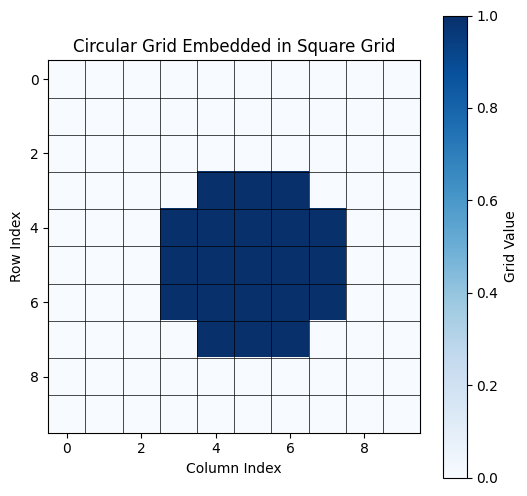

In [2]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

def laplacian_circle_in_square(n, N, sparse=True):
    """
    Create the Laplacian matrix for a circular grid embedded in an N x N square grid.
    :param n: Diameter of the circle (approximate number of points across the circle)
    :param N: Size of the square grid (N x N)
    :param sparse: Whether to return the Laplacian as a sparse matrix
    :return: Sparse Laplacian matrix of shape (N^2, N^2), grid points
    """
    if N < n:
        raise ValueError("N must be greater than or equal to n.")

    if n == 1:
        matrix = sp.csr_matrix(([-4], ([0], [0])), shape=(N * N, N * N)) if sparse else np.zeros((N * N, N * N))
        return matrix, None

    # Generate circular grid points
    radius = n / 2
    center = N // 2  # Center of the square grid
    points = []

    for i in range(N):
        for j in range(N):
            x, y = i - center, j - center
            if x**2 + y**2 <= radius**2:
                points.append((i, j))

    num_points = len(points)
    L = sp.lil_matrix((N * N, N * N)) if sparse else np.zeros((N * N, N * N))

    # Build Laplacian using finite differences
    point_indices = {point: idx for idx, point in enumerate(points)}
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 4-point stencil

    for (i, j), idx in point_indices.items():
        grid_idx = i * N + j
        L[grid_idx, grid_idx] = -4
        for di, dj in directions:
            neighbor = (i + di, j + dj)
            if neighbor in point_indices:
                neighbor_idx = neighbor[0] * N + neighbor[1]
                L[grid_idx, neighbor_idx] = 1

    return (L.tocsr(), points) if sparse else (L, points)

def plot_grid(points, N):
    """Plot the circular grid embedded in the square grid."""
    grid = np.zeros((N, N))
    for i, j in points:
        grid[i, j] = 1

    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap='Blues', interpolation='none')
    plt.colorbar(label='Grid Value')
    plt.title("Circular Grid Embedded in Square Grid")
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")

    # Add gridlines
    ax = plt.gca()
    ax.set_xticks(np.arange(-0.5, N, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", size=0)

    plt.show()

# Example usage:
n = 5  # Diameter of the circle
N = 10  # Size of the square grid
laplacian, points = laplacian_circle_in_square(n, N)
print("Laplacian Matrix:")
print(laplacian.toarray())
plot_grid(points, N)

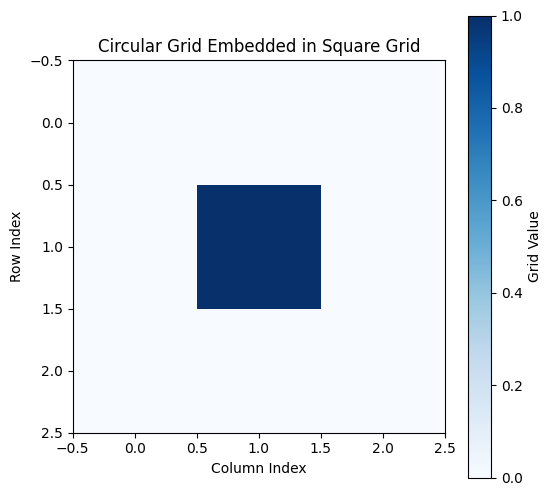

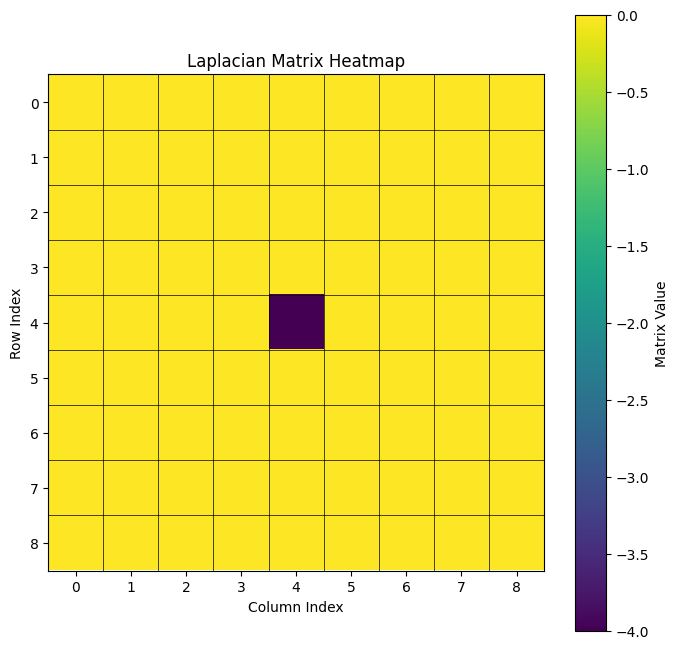

In [18]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

def laplacian_circle_in_square_with_plot(n, N, sparse=True):
    """
    Create the Laplacian matrix for a circular grid embedded in an N x N square grid,
    and plot the grid and Laplacian matrix.
    :param n: Diameter of the circle (approximate number of points across the circle)
    :param N: Size of the square grid (N x N)
    :param sparse: Whether to return the Laplacian as a sparse matrix
    :return: Sparse Laplacian matrix of shape (N^2, N^2), grid points
    """
    if N < n:
        raise ValueError("N must be greater than or equal to n.")

    if n == 1:
        center = N // 2
        points = [(center, center)]  # Single point at the center
        L = sp.lil_matrix((N * N, N * N)) if sparse else np.zeros((N * N, N * N))
        grid_idx = center * N + center
        L[grid_idx, grid_idx] = -4
        L = L.tocsr() if sparse else L

        # Plot the grid
        grid = np.zeros((N, N))
        for i, j in points:
            grid[i, j] = 1

        plt.figure(figsize=(6, 6))
        plt.imshow(grid, cmap='Blues', interpolation='none')
        plt.colorbar(label='Grid Value')
        plt.title("Circular Grid Embedded in Square Grid")
        plt.xlabel("Column Index")
        plt.ylabel("Row Index")
        ax = plt.gca()
        ax.set_xticks(np.arange(-0.5, N, 1), minor=True)
        ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
        ax.tick_params(which="minor", size=0)
        plt.show()

        # Plot the Laplacian matrix
        plt.figure(figsize=(8, 8))
        plt.imshow(L.toarray(), cmap='viridis', interpolation='none')
        plt.colorbar(label='Matrix Value')
        plt.title("Laplacian Matrix Heatmap")
        plt.xlabel("Column Index")
        plt.ylabel("Row Index")
        ax = plt.gca()
        ax.set_xticks(np.arange(-0.5, L.shape[0], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, L.shape[1], 1), minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
        ax.tick_params(which="minor", size=0)
        plt.show()

        return L, points

    # Generate circular grid points
    radius = n / 2
    center = N // 2  # Center of the square grid
    points = []

    for i in range(N):
        for j in range(N):
            x, y = i - center, j - center
            if x**2 + y**2 <= radius**2:
                points.append((i, j))

    num_points = len(points)
    L = sp.lil_matrix((N * N, N * N)) if sparse else np.zeros((N * N, N * N))

    # Build Laplacian using finite differences
    point_indices = {point: idx for idx, point in enumerate(points)}
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 4-point stencil

    for (i, j), idx in point_indices.items():
        grid_idx = i * N + j
        L[grid_idx, grid_idx] = -4
        for di, dj in directions:
            neighbor = (i + di, j + dj)
            if neighbor in point_indices:
                neighbor_idx = neighbor[0] * N + neighbor[1]
                L[grid_idx, neighbor_idx] = 1

    L = L.tocsr() if sparse else L

    # Plot the grid
    grid = np.zeros((N, N))
    for i, j in points:
        grid[i, j] = 1

    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap='Blues', interpolation='none')
    plt.colorbar(label='Grid Value')
    plt.title("Circular Grid Embedded in Square Grid")
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")
    ax = plt.gca()
    ax.set_xticks(np.arange(-0.5, N, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", size=0)
    plt.show()

    # Plot the Laplacian matrix
    plt.figure(figsize=(8, 8))
    plt.imshow(L.toarray(), cmap='viridis', interpolation='none')
    plt.colorbar(label='Matrix Value')
    plt.title("Laplacian Matrix Heatmap")
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")
    ax = plt.gca()
    ax.set_xticks(np.arange(-0.5, L.shape[0], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, L.shape[1], 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", size=0)
    plt.show()

    return L, points

# Example usage:
laplacian, points = laplacian_circle_in_square_with_plot(n, N)